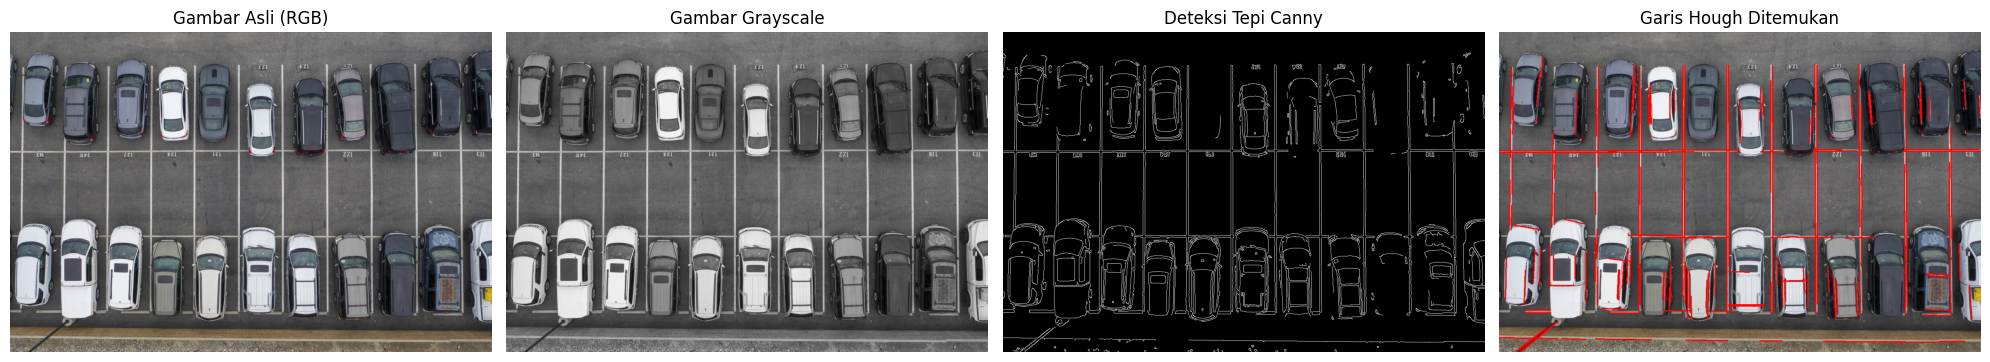

Pengolahan gambar berhasil diselesaikan dan ditampilkan.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# --- 1. Memuat Gambar ---

image_path = 'parkiran.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Gambar '{image_path}' tidak dapat dimuat. Pastikan file ada di direktori yang benar.")
else:
# --- 2. Pra-pemrosesan Gambar ---

    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# --- 3. Deteksi Tepi Menggunakan Metode Canny ---

    blurred_gray = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # Deteksi tepi Canny
    canny_edges = cv2.Canny(blurred_gray, 100, 200) # Ambang batas disesuaikan sedikit

    # --- 4. Deteksi Garis Menggunakan Transformasi Hough (Probabilistic Hough Line Transform) ---
    hough_lines = cv2.HoughLinesP(canny_edges, 1, np.pi / 180,
                                  threshold=50,
                                  minLineLength=50,
                                  maxLineGap=10)

    # Buat salinan gambar asli untuk menggambar garis
    image_with_lines = image_rgb.copy()

    # Gambar garis-garis yang terdeteksi
    if hough_lines is not None:
        for line in hough_lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)
    else:
        print("Tidak ada garis yang terdeteksi menggunakan HoughLinesP dengan parameter yang diberikan.")

    # --- 5. Menampilkan Hasil ---
    fig, axs = plt.subplots(1, 4, figsize=(20, 8))
    axs = axs.ravel()

    # Gambar Asli
    axs[0].imshow(image_rgb)
    axs[0].set_title('Gambar Asli (RGB)')
    axs[0].axis('off') # Sembunyikan sumbu

    # Gambar Grayscale
    axs[1].imshow(gray_image, cmap='gray')
    axs[1].set_title('Gambar Grayscale')
    axs[1].axis('off')

    # Hasil Deteksi Tepi Canny
    axs[2].imshow(canny_edges, cmap='gray')
    axs[2].set_title('Deteksi Tepi Canny')
    axs[2].axis('off')

    # Hasil Deteksi Garis Hough
    axs[3].imshow(image_with_lines)
    axs[3].set_title('Garis Hough Ditemukan')
    axs[3].axis('off')

    plt.tight_layout()
    plt.show()

    print("Pengolahan gambar berhasil diselesaikan dan ditampilkan.")

Dimensi gambar /content/Makanan _Sulawesi.jpg: (900, 1200, 3)


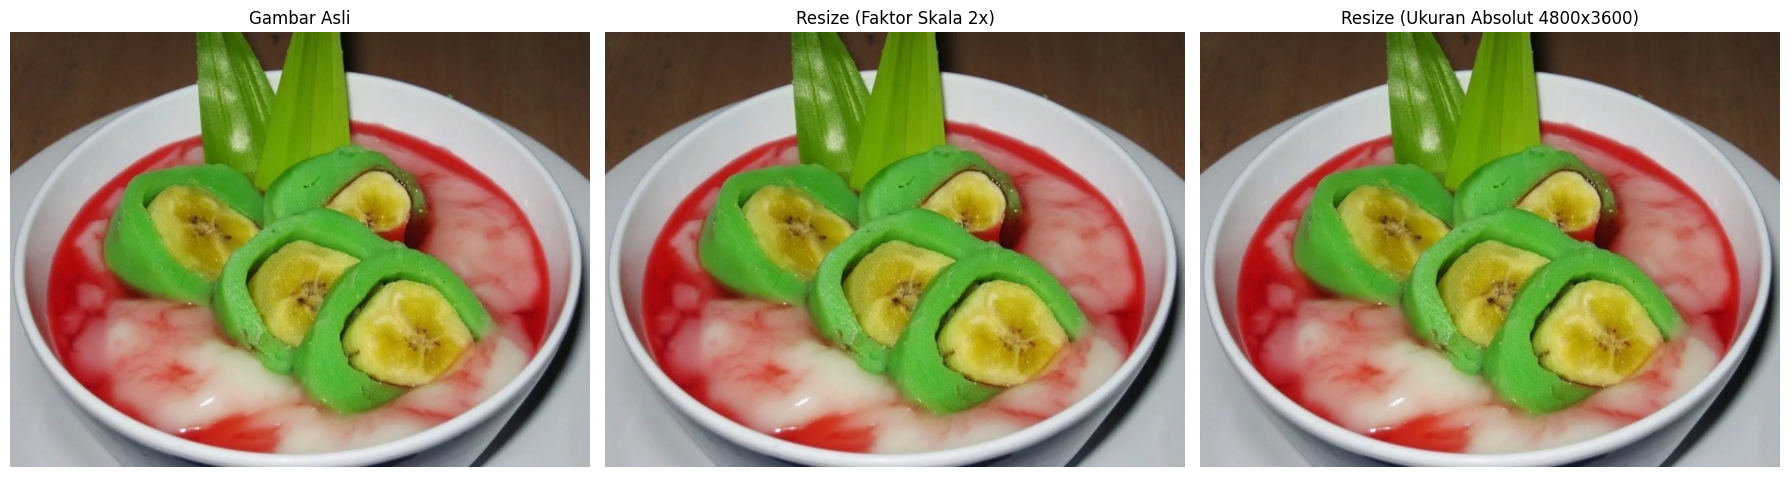

Dimensi gambar untuk rotasi: (900, 1200, 3)


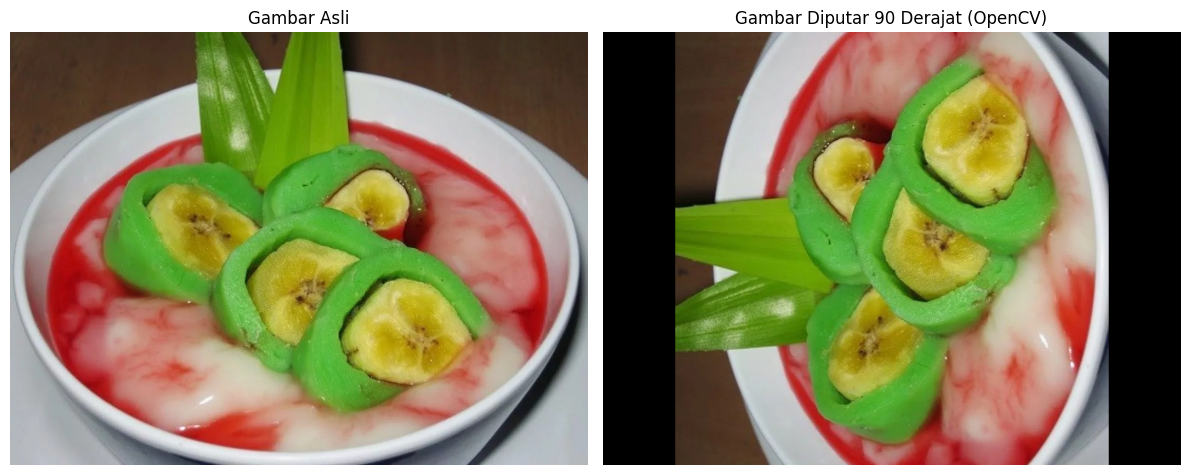

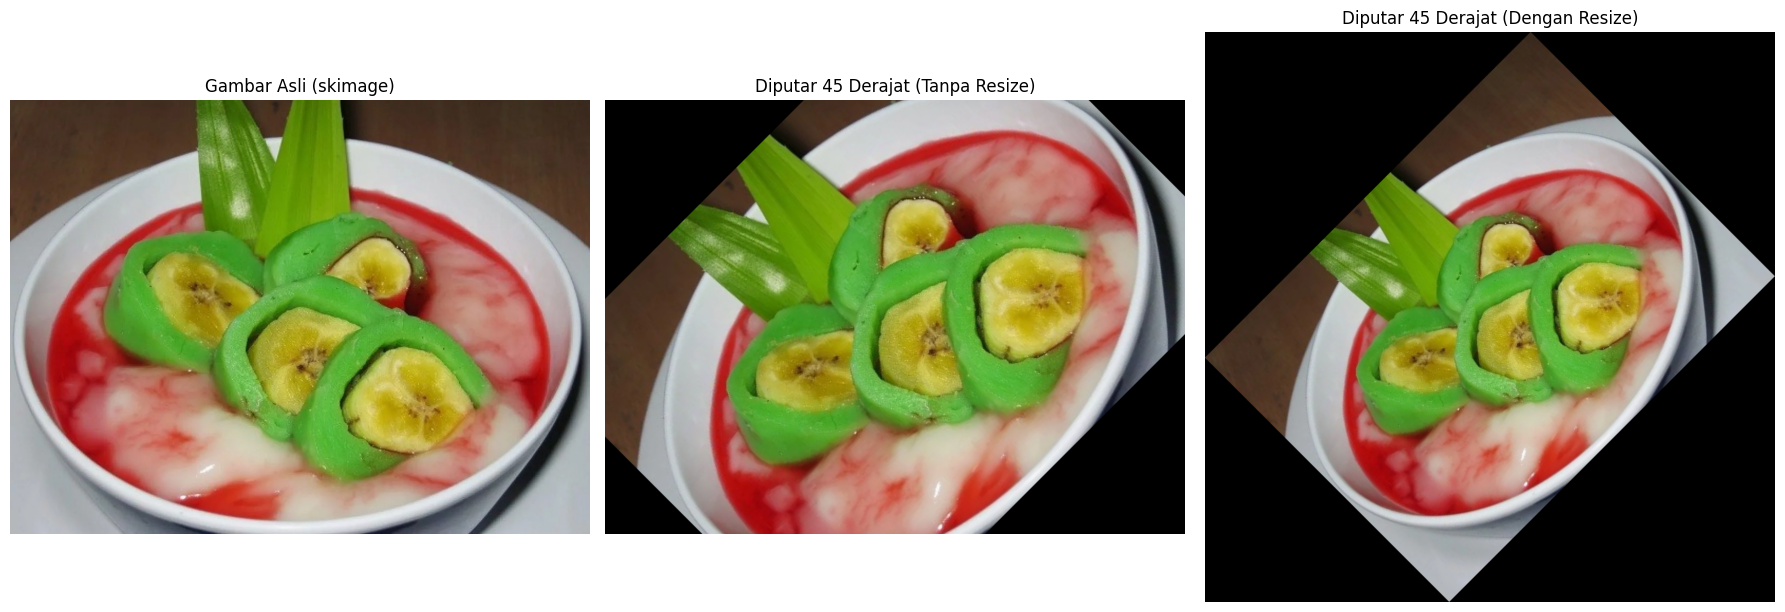

Semua proses pengolahan gambar (resize dan rotasi) telah diselesaikan dengan gambar Makanan_Sulawesi.jpg.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io, transform

makanan_sulawesi_path = '/content/Makanan _Sulawesi.jpg'

# --- Bagian 1: Pengolahan Gambar Makanan Sulawesi (Resize) ---


img_makanan_sulawesi = cv2.imread(makanan_sulawesi_path)


if img_makanan_sulawesi is None:
    print(f"Error: Gambar '{makanan_sulawesi_path}' tidak dapat dimuat. Pastikan file ada di direktori yang benar.")
else:

    img_makanan_sulawesi_rgb = cv2.cvtColor(img_makanan_sulawesi, cv2.COLOR_BGR2RGB)


    rows_makanan, cols_makanan = img_makanan_sulawesi.shape[:2]
    print(f'Dimensi gambar {makanan_sulawesi_path}: {img_makanan_sulawesi.shape}')

    # Resize Cara 1: Menggunakan faktor skala (fx, fy)
    resized_fx_fy = cv2.resize(img_makanan_sulawesi, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    resized_fx_fy_rgb = cv2.cvtColor(resized_fx_fy, cv2.COLOR_BGR2RGB)


    # Resize Cara 2: Menggunakan ukuran absolut
    new_width_abs = cols_makanan * 4
    new_height_abs = rows_makanan * 4
    resized_abs_size = cv2.resize(img_makanan_sulawesi, (new_width_abs, new_height_abs), interpolation=cv2.INTER_CUBIC)
    resized_abs_size_rgb = cv2.cvtColor(resized_abs_size, cv2.COLOR_BGR2RGB)

    # Tampilkan hasil resize
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].imshow(img_makanan_sulawesi_rgb)
    axs[0].set_title('Gambar Asli')
    axs[0].axis('off')

    axs[1].imshow(resized_fx_fy_rgb)
    axs[1].set_title('Resize (Faktor Skala 2x)')
    axs[1].axis('off')

    axs[2].imshow(resized_abs_size_rgb)
    axs[2].set_title(f'Resize (Ukuran Absolut {new_width_abs}x{new_height_abs})')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

    # --- Bagian 2: Pengolahan Gambar Makanan Sulawesi (Rotasi dengan OpenCV) ---

    rows_rot, cols_rot = img_makanan_sulawesi.shape[:2] # Menggunakan dimensi asli
    print(f'Dimensi gambar untuk rotasi: {img_makanan_sulawesi.shape}')

    # Rotasi Cara 1: Menggunakan OpenCV (Rotasi 90 derajat)
    # Pusat rotasi di tengah gambar
    M_rotate_cv = cv2.getRotationMatrix2D(((cols_rot-1)/2, (rows_rot-1)/2), 90, 1)
    rotated_cv_image = cv2.warpAffine(img_makanan_sulawesi_rgb, M_rotate_cv, (cols_rot, rows_rot)) # WarpAffine pada gambar RGB

    # Tampilkan hasil rotasi OpenCV
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img_makanan_sulawesi_rgb)
    axs[0].set_title('Gambar Asli')
    axs[0].axis('off')

    axs[1].imshow(rotated_cv_image)
    axs[1].set_title('Gambar Diputar 90 Derajat (OpenCV)')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

    # --- Bagian 3: Pengolahan Gambar Makanan Sulawesi (Rotasi dengan scikit-image) ---
    img_makanan_skimage = io.imread(makanan_sulawesi_path)

    # Rotasi Cara 2: Menggunakan scikit-image (Rotasi 45 derajat)
    # resize=False: Ukuran gambar keluaran sama dengan input, bagian yang diputar akan terpotong
    rotated_skimage_no_resize = transform.rotate(img_makanan_skimage, 45, resize=False)
    # resize=True: Ukuran gambar keluaran disesuaikan agar seluruh gambar hasil rotasi muat
    rotated_skimage_with_resize = transform.rotate(img_makanan_skimage, 45, resize=True)

    # Tampilkan hasil rotasi scikit-image
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    axs[0].imshow(img_makanan_skimage)
    axs[0].set_title('Gambar Asli (skimage)')
    axs[0].axis('off')

    axs[1].imshow(rotated_skimage_no_resize)
    axs[1].set_title('Diputar 45 Derajat (Tanpa Resize)')
    axs[1].axis('off')

    axs[2].imshow(rotated_skimage_with_resize)
    axs[2].set_title('Diputar 45 Derajat (Dengan Resize)')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

print("Semua proses pengolahan gambar (resize dan rotasi) telah diselesaikan dengan gambar Makanan_Sulawesi.jpg.")


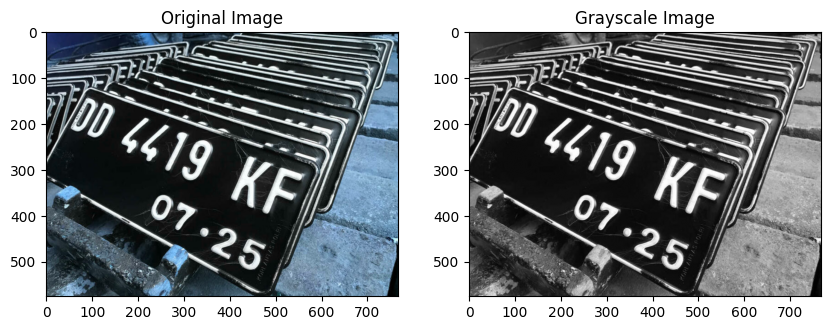

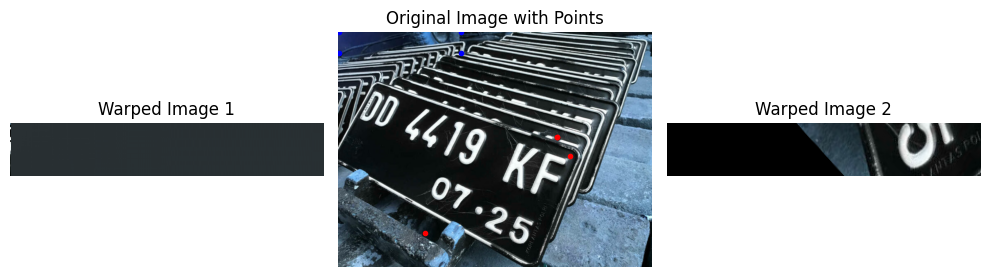

In [ ]:
t = cv2.imread('/content/plat.jpg')
t_gray = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(t)
ax[0].set_title('Original Image')
ax[1].imshow(t_gray, cmap='gray')
ax[1].set_title('Grayscale Image')
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
crp = np.array([[212, 493], [567, 303], [535, 256], [535, 256]])
crp2 = np.array([[165, 682], [199, 722], [529, 469], [496, 432]])

tform = transform.ProjectiveTransform()
tform.estimate(src, crp)
tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crp2)

warped = transform.warp(t, tform, output_shape=(50, 300))
warped2 = transform.warp(t, tform2, output_shape=(50, 300))

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
ax = axs.ravel()
ax[0].imshow(warped)
ax[0].set_title('Warped Image 1')
ax[1].imshow(t)
ax[1].plot(crp[:, 0], crp[:, 1], '.r')
ax[1].plot(src[:, 0], src[:, 1], '.b')
ax[1].set_title('Original Image with Points')

ax[2].imshow(warped2)
ax[2].set_title('Warped Image 2')
for a in axs:
    a.axis('off')

plt.tight_layout()
plt.show()
